#### Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Import dataset
train=pd.read_csv(r'C:\Users\PHOTON\Desktop\SIR PHOTON\KAGGLE\Wids\train.csv')
test=pd.read_csv(r'C:\Users\PHOTON\Desktop\SIR PHOTON\KAGGLE\Wids\test.csv')
submission=pd.read_csv(r'C:\Users\PHOTON\Desktop\SIR PHOTON\KAGGLE\Wids\sample_solution.csv')

In [3]:
train.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,248.682615,0
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,26.500150,1
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,24.693619,2
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,48.406926,3
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,3.899395,4


In [4]:
train.size

4848448

In [5]:
train.shape[0]

75757

In [6]:
test.shape[0]

9705

In [7]:
submission.shape[0]

9705

In [8]:
# Check for missing datapoints on the trainning set
train.isna().sum()

Year_Factor                      0
State_Factor                     0
building_class                   0
facility_type                    0
floor_area                       0
                             ...  
direction_peak_wind_speed    41811
max_wind_speed               41082
days_with_fog                45796
site_eui                         0
id                               0
Length: 64, dtype: int64

In [9]:
# Identify columns with missing data
columns_with_missing = train.columns[train.isnull().any()]

# Get the number of missing values for each column
missing_data_counts = train[columns_with_missing].isnull().sum()

# Display columns with missing data and the number of missing values
missing_data_info = pd.DataFrame({
    'Columns with Missing Data': columns_with_missing,
    'Number of Missing Values': missing_data_counts})

In [10]:
missing_data_info

,Columns with Missing Data,Number of Missing Values
year_built,year_built,1837
energy_star_rating,energy_star_rating,26709
direction_max_wind_speed,direction_max_wind_speed,41082
direction_peak_wind_speed,direction_peak_wind_speed,41811
max_wind_speed,max_wind_speed,41082
days_with_fog,days_with_fog,45796


The dataframe illustrate the missing columns with their missing datapoints numbers

In [11]:
# Lets deal with the missing data first, dropping the columns with large missing datapoints
cols=['direction_max_wind_speed', 'direction_peak_wind_speed', 'max_wind_speed', 'days_with_fog']
train=train.drop(cols, axis=1)

In [12]:
def bp(i):
    sns.boxplot(y=i)
    

<AxesSubplot:ylabel='energy_star_rating'>

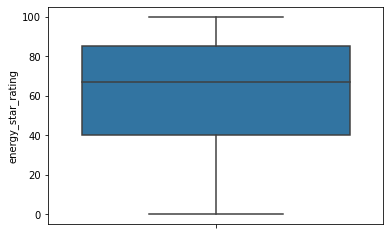

In [13]:
sns.boxplot(y=train['energy_star_rating'])


In [14]:
train['energy_star_rating']=train['energy_star_rating'].fillna(train['energy_star_rating'].mean())

<AxesSubplot:ylabel='year_built'>

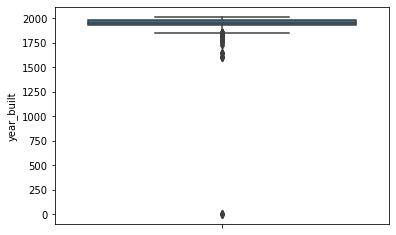

In [15]:
sns.boxplot(y=train['year_built'])

There is a problem with year built apart from missing values, hence the column has to be removed.

In [16]:
train=train.drop('year_built', axis=1)

In [17]:
train.isna().sum()

Year_Factor             0
State_Factor            0
building_class          0
facility_type           0
floor_area              0
energy_star_rating      0
ELEVATION               0
january_min_temp        0
january_avg_temp        0
january_max_temp        0
february_min_temp       0
february_avg_temp       0
february_max_temp       0
march_min_temp          0
march_avg_temp          0
march_max_temp          0
april_min_temp          0
april_avg_temp          0
april_max_temp          0
may_min_temp            0
may_avg_temp            0
may_max_temp            0
june_min_temp           0
june_avg_temp           0
june_max_temp           0
july_min_temp           0
july_avg_temp           0
july_max_temp           0
august_min_temp         0
august_avg_temp         0
august_max_temp         0
september_min_temp      0
september_avg_temp      0
september_max_temp      0
october_min_temp        0
october_avg_temp        0
october_max_temp        0
november_min_temp       0
november_avg

Yeah, the data is now clean

#### EDA

<AxesSubplot:xlabel='avg_temp', ylabel='site_eui'>

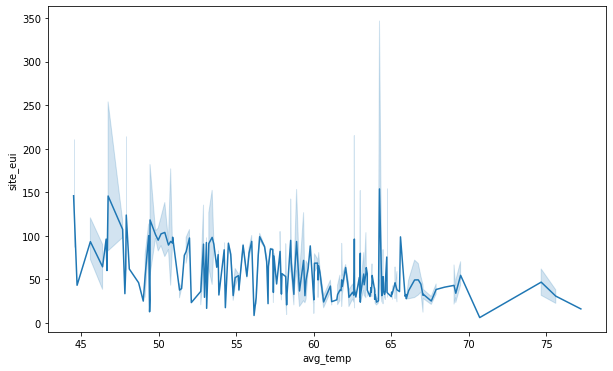

In [18]:
plt.figure(figsize=(10,6))
sns.lineplot(x='avg_temp', y='site_eui', data=train)

<AxesSubplot:ylabel='avg_temp'>

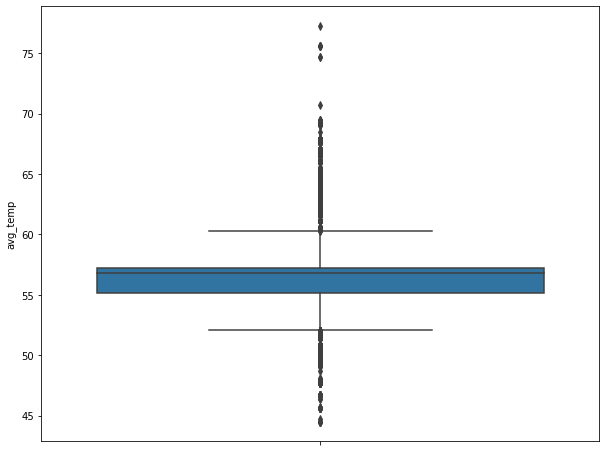

In [19]:
plt.figure(figsize=(10,8))
sns.boxplot(y='avg_temp', data=train)

<AxesSubplot:xlabel='avg_temp', ylabel='Count'>

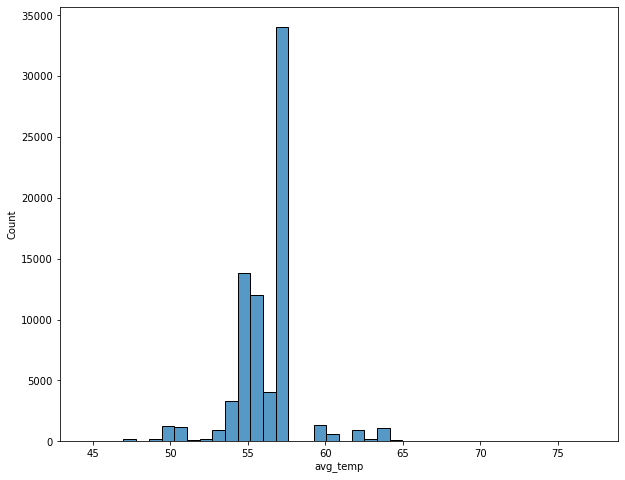

In [20]:
plt.figure(figsize=(10,8))
sns.histplot(x='avg_temp', data=train, bins=40)

In [21]:
def conv(x):
    if x.startswith('State_'):
        return(int(x.replace('State_','')))
    else:
        return x

In [22]:
train['State_Factor']=train['State_Factor'].apply(conv)
train['building_class']=train['building_class'].apply(lambda x: 1 if x=='Residential' else 0)
train=train.drop(['facility_type', 'id'], axis=1)



In [23]:
x=train.drop('site_eui', axis=1)
y=train['site_eui']

In [24]:
train['Year_Factor']

0        1
1        1
2        1
3        1
4        1
        ..
75752    6
75753    6
75754    6
75755    6
75756    6
Name: Year_Factor, Length: 75757, dtype: int64

### Modeling

In [25]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold, RepeatedKFold, RandomizedSearchCV, GridSearchCV
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [26]:
# Scaling the training set
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x)

# Split the model
x_train, x_test, y_train, y_test=train_test_split(x, y, random_state=101, test_size=0.3)


In [27]:
model=XGBRegressor()
# k_fold crossvalidation
cv1=RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
#Grid seacrh
params={'n_estimators':[100, 200] ,'max_depth':[7, 10]}
g_search=RandomizedSearchCV(model, params, cv=cv1, scoring='neg_mean_squared_error', n_iter=2)
g_search_model=g_search.fit(x_train, y_train)

#c_score=cross_val_score(model, x, y, cv=cv1)

In [28]:
best=g_search.best_params_

In [29]:
best



{'n_estimators': 200, 'max_depth': 7}

In [30]:
pred=g_search.predict(x_test)

In [31]:
print(f'MSE: {mean_squared_error(y_test, pred)}, RMSE: {np.sqrt(mean_squared_error(y_test, pred))}')

MSE: 2410.109157845914, RMSE: 49.09286259575738


The best parameter chosen was used to carryout energy prediction with the test dataset.

In [33]:
# Prediction with the test dataset
test.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,id
0,7,State_1,Commercial,Grocery_store_or_food_market,28484.0,1994.0,37.0,2.4,38,50.596774,...,0,29,5,2,0,NaN,NaN,NaN,NaN,75757
1,7,State_1,Commercial,Grocery_store_or_food_market,21906.0,1961.0,55.0,45.7,38,50.596774,...,0,29,5,2,0,NaN,NaN,NaN,NaN,75758
2,7,State_1,Commercial,Grocery_store_or_food_market,16138.0,1950.0,1.0,59.1,38,50.596774,...,0,29,5,2,0,NaN,NaN,NaN,NaN,75759
3,7,State_1,Commercial,Grocery_store_or_food_market,97422.0,1971.0,34.0,35.4,38,50.596774,...,0,29,5,2,0,NaN,NaN,NaN,NaN,75760
4,7,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,35.0,1.8,38,50.596774,...,0,29,5,2,0,340.0,330.0,22.8,126.0,75761


In [34]:
test.shape

(9705, 63)

In [35]:
# CHeck for missing data
test.isna().sum()

Year_Factor                     0
State_Factor                    0
building_class                  0
facility_type                   0
floor_area                      0
                             ... 
direction_max_wind_speed     8575
direction_peak_wind_speed    8575
max_wind_speed               8575
days_with_fog                9117
id                              0
Length: 63, dtype: int64

In [36]:
missing_col=test.columns[test.isna().any()]
missing_subset=test[missing_col]
num_missing=missing_subset.isna().sum()

pd.DataFrame({ 'points_missing':num_missing})

,points_missing
year_built,92
energy_star_rating,2254
direction_max_wind_speed,8575
direction_peak_wind_speed,8575
max_wind_speed,8575
days_with_fog,9117


In [37]:
# Lets deal with the missing data first, dropping the columns with large missing datapoints
cols=['direction_max_wind_speed', 'direction_peak_wind_speed', 'max_wind_speed', 'days_with_fog']
test=test.drop(cols, axis=1)

In [38]:
# Replacing missing value in 'energy_star_built'
test.drop('year_built', inplace=True, axis=1)

<AxesSubplot:ylabel='energy_star_rating'>

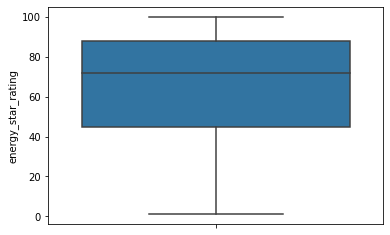

In [39]:
sns.boxplot(y=test['energy_star_rating'])

In [40]:
from sklearn.impute import SimpleImputer
inputer=SimpleImputer(missing_values=np.nan, strategy='mean')
test[['energy_star_rating']]=inputer.fit_transform(test[['energy_star_rating']])

In [41]:
test['State_Factor']=test['State_Factor'].apply(conv)
test['building_class']=test['building_class'].apply(lambda x: 1 if x=='Residential' else 0)
test=test.drop(['facility_type', 'id'], axis=1)
test.head()

,Year_Factor,State_Factor,building_class,floor_area,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,...,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F
0,7,1,0,28484.0,37.0,2.4,38,50.596774,64,40,...,0,59.894521,0,0,0,0,29,5,2,0
1,7,1,0,21906.0,55.0,45.7,38,50.596774,64,40,...,0,59.894521,0,0,0,0,29,5,2,0
2,7,1,0,16138.0,1.0,59.1,38,50.596774,64,40,...,0,59.894521,0,0,0,0,29,5,2,0
3,7,1,0,97422.0,34.0,35.4,38,50.596774,64,40,...,0,59.894521,0,0,0,0,29,5,2,0
4,7,1,0,61242.0,35.0,1.8,38,50.596774,64,40,...,0,59.894521,0,0,0,0,29,5,2,0


In [42]:
scaler_test=scaler.fit_transform(test)


In [43]:
prediction=g_search.predict(scaler_test)

In [44]:
prediction

array([300.6562 , 327.806  , 300.6562 , ..., 494.62802, 494.62802,
       494.62802], dtype=float32)

In [45]:
submission['site_eui']=np.round(prediction,1)
submission.to_csv(r'submission.csv', index=False)